In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn import datasets
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [2]:

%matplotlib inline


In [3]:
df = pd.read_csv("/home/maria/Downloads/temps.csv")
df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42


In [3]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [4]:
df=pd.get_dummies(df)

In [23]:
from sklearn.model_selection import train_test_split,TimeSeriesSplit, cross_val_score

df1=df.drop("actual",axis=1)
y=df["actual"]
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.30, random_state=2)


In [6]:
from sklearn.model_selection import GridSearchCV

lista_parametros = { 'criterion' : ['mse', 'mae'],
                    'n_estimators' : [50,75,100,120, 150],
                    'max_depth' : [1, 2, 4, 5, 10, None],
                    'min_samples_split' : [2, 4, 5, 10], # Default = 2
                    'min_samples_leaf' : [1, 2, 3, 4, 5], # Default = 1
                    'max_features' : ['auto', 'sqrt', 'log2'], # Default = "auto"
                    'max_leaf_nodes' : [2, 3, 4, 5, None],
                    'min_samples_leaf' : [1, 2, 4, 5, 10], # Default = 1
                    }
model = ensemble.RandomForestRegressor()
time_split=TimeSeriesSplit(n_splits=3)

clf = GridSearchCV(estimator=model,cv=time_split,param_grid=lista_parametros, n_jobs= -1)
clf.fit(X_train, y_train)

print("Best parameters:")
print()
print(clf.best_params_)
print()
print(clf.best_score_)

Best parameters:

{'criterion': 'mse', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}

0.8189092181070228


In [24]:
model = ensemble.RandomForestRegressor(criterion='mse', max_depth=5, max_features='sqrt', max_leaf_nodes=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50)
model.fit(X_train, y_train)
print(model.score(X_test,y_test))

0.807148578880756


In [39]:
Y_pred=model.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("Erro médio: ", mean_squared_error(y_test, Y_pred))
print("Variância: ", r2_score(y_test, Y_pred))

Erro médio:  21.770257885022918
Variância:  0.8071485788807559


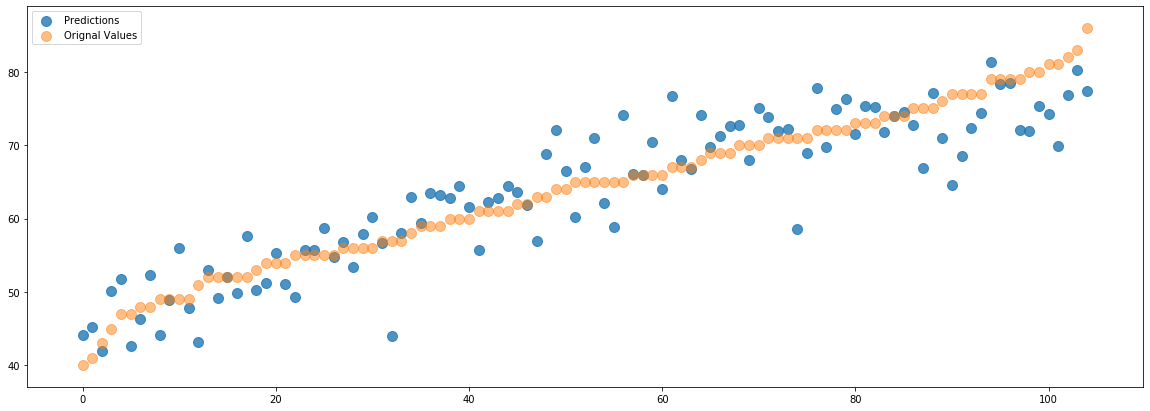

In [42]:

plt.figure(figsize=(20,7))
idx = np.argsort(y_test)
plt.rcParams['axes.facecolor'] = 'w'

plt.scatter(range(len(y_test)), Y_pred[idx],label="Predictions",s=100,alpha=0.8)
plt.scatter(range(len(y_test)), y_test.iloc[idx],label="Orignal Values",s=100,alpha=0.5)
plt.legend()

In [31]:
model2 = ensemble.RandomForestRegressor(criterion='mse', max_depth=5, max_features='sqrt', max_leaf_nodes=None, min_samples_leaf=2, min_samples_split=5, n_estimators=1)
model2.fit(X_train, y_train)
print(model2.score(X_test,y_test))

0.5996959847785477


In [36]:
Y_pred2=model2.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("Erro médio modelo com 1 arvore: ", mean_squared_error(y_test, Y_pred2))
print("Variância modelo com 1 arvore: ", r2_score(y_test, Y_pred2))

Erro médio modelo com 1 arvore:  45.18878623348416
Variância modelo com 1 arvore:  0.5996959847785477


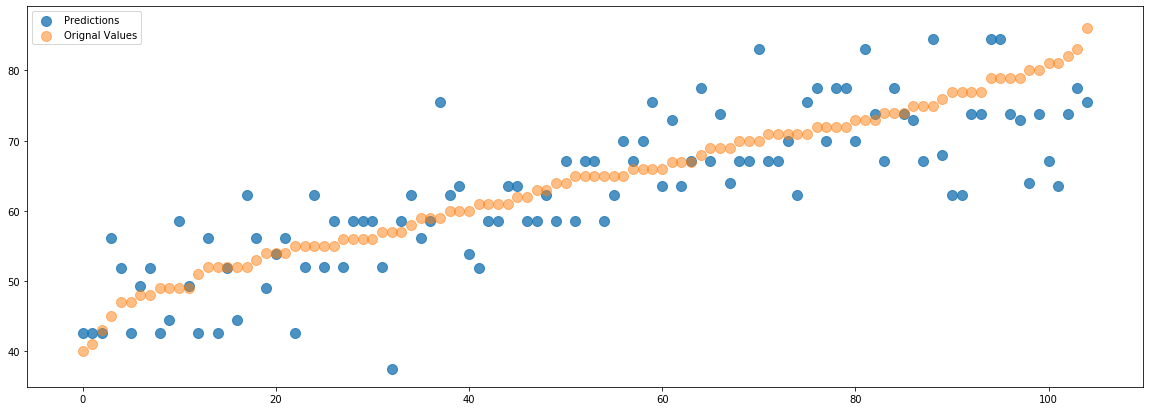

In [43]:

plt.figure(figsize=(20,7))
idx = np.argsort(y_test)
plt.rcParams['axes.facecolor'] = 'w'

plt.scatter(range(len(y_test)), Y_pred2[idx],label="Predictions",s=100,alpha=0.8)
plt.scatter(range(len(y_test)), y_test.iloc[idx],label="Orignal Values",s=100,alpha=0.5)
plt.legend()